<a href="https://colab.research.google.com/github/Bhandaram-Vasishta/Mnist-Classifiction/blob/master/Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Mnist/mnist_train.csv')

In [ ]:
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
l=data['label']
d = data.drop("label",axis=1)
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


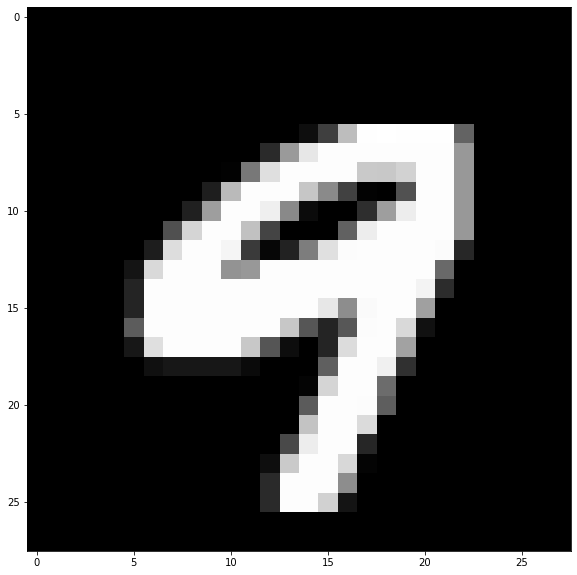

9


In [ ]:
plt.figure(figsize=(10,10))
idx = 187

grid_data = d.iloc[idx].to_numpy().reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data,cmap = "gray")
plt.show()

print(l[idx])

In [ ]:
labels = l.head(15000)
data = d.head(15000)

print("the shape of sample data = ", data.shape)

the shape of sample data =  (15000, 784)


In [ ]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(15000, 784)


In [ ]:
from sklearn.manifold import TSNE

# Picking the top 1000 points as TSNE takes a lot of time for 15K points
data_1000 = standardized_data[0:1000,]

labels_1000 = labels[0:1000]

model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(data_1000)
print(tsne_data)

print(tsne_data.shape)

[[ -6.942395  -9.005229]
 [ 42.456215 -11.925229]
 [ -9.46264   11.180339]
 ...
 [-43.996685  -4.050072]
 [ 52.891964  17.216667]
 [-23.335169 -14.266618]]
(1000, 2)


In [ ]:
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_data.shape

(1000, 3)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


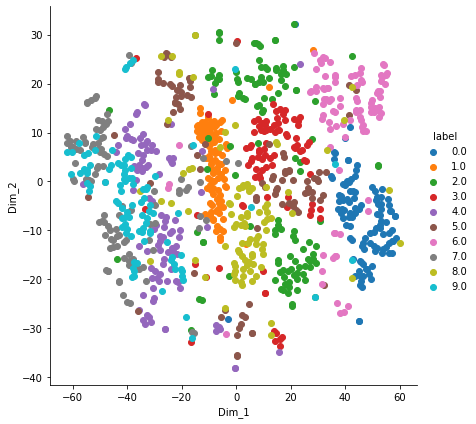

In [ ]:
import seaborn as sn
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

In [ ]:
data_test=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Mnist/mnist_test.csv')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3,random_state=0)
data1=data.values
# data1.shape
train_index, test_index =next(sss.split(data1,labels))
x_train=data1[train_index]
x_test=data1[test_index]
y_train=labels[train_index]
y_test=labels[test_index]
print(x_train.shape)
print(y_train.shape)

(10500, 784)
(10500,)


In [ ]:
from tqdm import tqdm
from tqdm import trange
for i in trange(4,7):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    # evaluate the model and update the accuracies list
    score = model.score(x_test,y_test)
    print("k=%d, accuracy=%.2f%%" % (i, score * 100)) 


 33%|███▎      | 1/3 [01:26<02:52, 86.47s/it]

k=4, accuracy=94.69%



 67%|██████▋   | 2/3 [02:52<01:26, 86.38s/it]

k=5, accuracy=94.76%



100%|██████████| 3/3 [04:19<00:00, 86.39s/it]

k=6, accuracy=94.60%


In [ ]:
#@title Default title text
for i in trange(1,4):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    # evaluate the model and update the accuracies list
    score = model.score(x_test,y_test)
    print("k=%d, accuracy=%.2f%%" % (i, score * 100)) 


 33%|███▎      | 1/3 [01:26<02:52, 86.30s/it]

k=1, accuracy=95.00%



 67%|██████▋   | 2/3 [02:52<01:26, 86.32s/it]

k=2, accuracy=94.00%



100%|██████████| 3/3 [04:19<00:00, 86.55s/it]

k=3, accuracy=94.93%


In [67]:
from scipy import misc
import imageio
import cv2

In [153]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(x_train,y_train)
img = cv2.imread("/content/drive/My Drive/Colab Notebooks/Mnist/8.png")
print(img.shape)
print(img.dtype)
print(data1.dtype)
img=img.astype(data1.dtype)
print(img.dtype)
print(data1.shape)

(28, 28, 3)
uint8
int64
int64
(15000, 784)


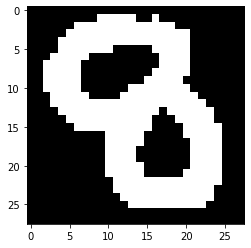

In [171]:
plt.imshow(img,cmap = "gray")
plt.show()
#print(img)
# print(data1.shape)



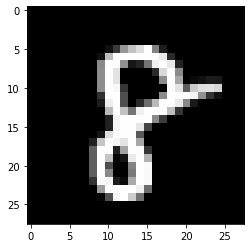

In [155]:
predict=[]
for i in img:
  for j in i:
    predict.append(sum(j)//3)

kl=data.iloc[-3].to_numpy().reshape(28,28)
plt.imshow(kl,cmap='gray')
plt.show()

In [157]:
print(model.predict([predict]))

[5]


In [167]:
img1 = cv2.imread("/content/drive/My Drive/Colab Notebooks/Mnist/8(1).png")
img1=img1.astype(data1.dtype)

[3]


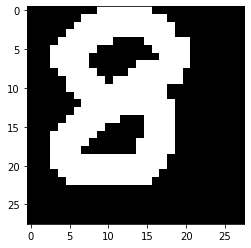

In [168]:
predict=[]
for i in img1:
  for j in i:
    predict.append(sum(j)//3)
print(model.predict([predict]))
plt.imshow(img1,cmap = "gray")
plt.show()

[2]


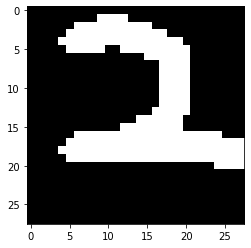

In [166]:
img1 = cv2.imread("/content/drive/My Drive/Colab Notebooks/Mnist/2.png")
img1=img1.astype(data1.dtype)
predict=[]
for i in img1:
  for j in i:
    predict.append(sum(j)//3)
print(model.predict([predict]))
plt.imshow(img1,cmap = "gray")
plt.show()

[3]


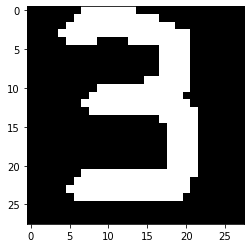

In [170]:
img1 = cv2.imread("/content/drive/My Drive/Colab Notebooks/Mnist/3.png")
img1=img1.astype(data1.dtype)
predict=[]
for i in img1:
  for j in i:
    predict.append(sum(j)//3)
print(model.predict([predict]))
plt.imshow(img1,cmap = "gray")
plt.show()

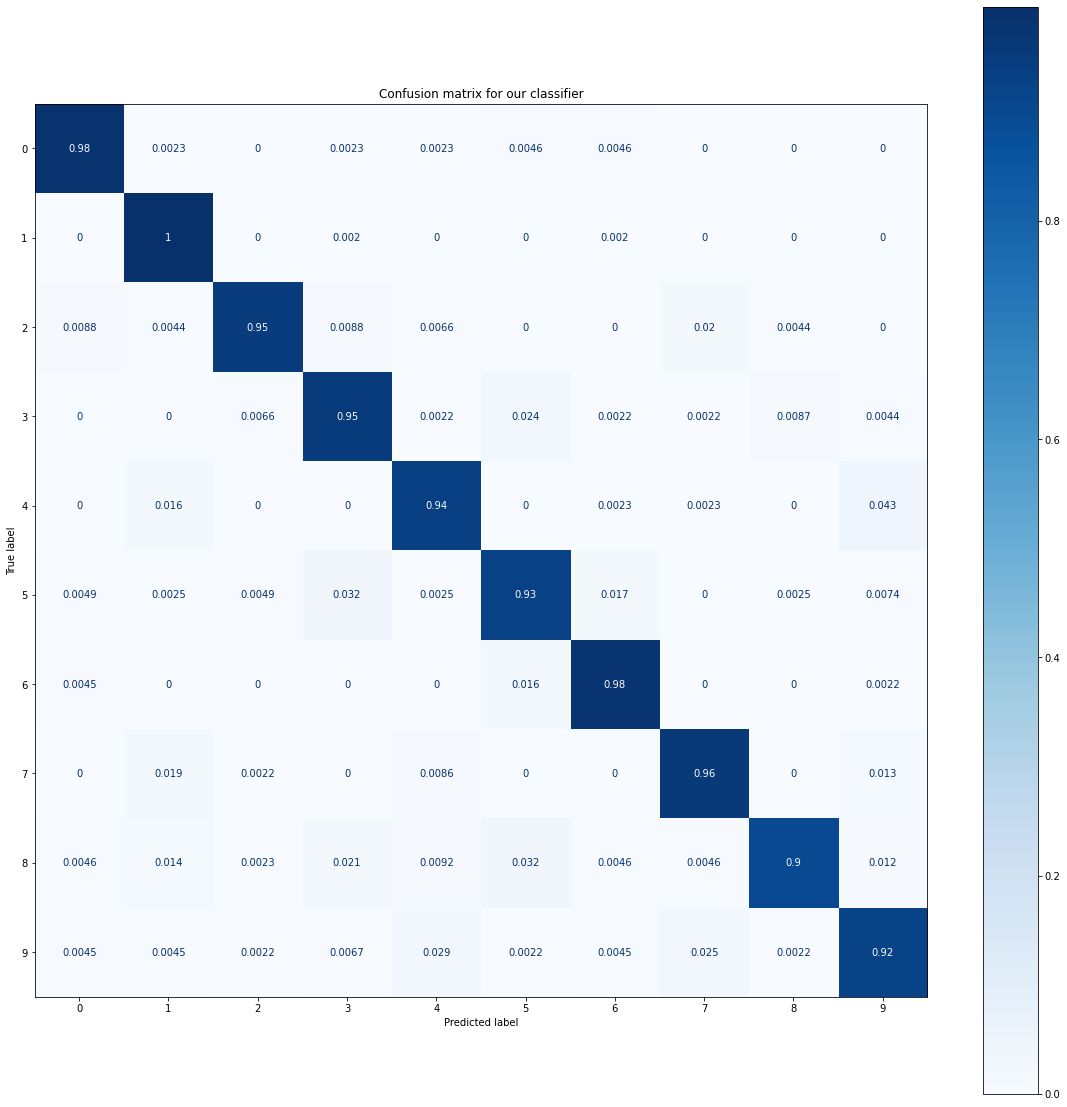

In [174]:
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions
# cm=metrics.confusion_matrix(y_)
fig, ax = plt.subplots(figsize=(20, 20))
matrix = plot_confusion_matrix(model, x_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true',
                               ax=ax)
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()